In [15]:
import numpy as np
import random
import pandas as pd

In [55]:
# load the data
rent = pd.read_csv('../../data/curated/API_re_clean.csv', index_col=0)
rent['weekly_rent'] = rent['weekly_rent'].astype(str)
rent['weekly_rent'] = rent['weekly_rent'].str.extract(r'([0-9]+)')
rent['weekly_rent'] = rent['weekly_rent'].astype(int)
rent['nbed'] = rent['nbed'].astype(int)
rent['nbath'] = rent['nbath'].astype(int)
rent = rent.dropna()
rent.head()
rent.dtypes

address              object
latitude            float64
longitude           float64
nbed                  int64
nbath                 int64
ncar                  int64
price                object
type                 object
historical_dates     object
postcode              int64
year                  int64
month                 int64
suburb               object
weekly_rent           int64
dtype: object

In [64]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# define features and outcome
features = ['latitude', 'longitude', 'nbed', 'nbath', 'postcode', 'ncar', 'year', 'month'] # Need to change postcode as categorical
outcome = ['weekly_rent']

# partition data into training and test sets
X = rent[features]
y = rent[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)# , random_state = 42)

# train model
reg = LinearRegression()
reg.fit(x_train, y_train)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    x_test, y_test = resample(x_train, y_train, replace=True)
    # evaluate model
    r2_score = reg.score(x_test, y_test)
    accuracy.append(r2_score)

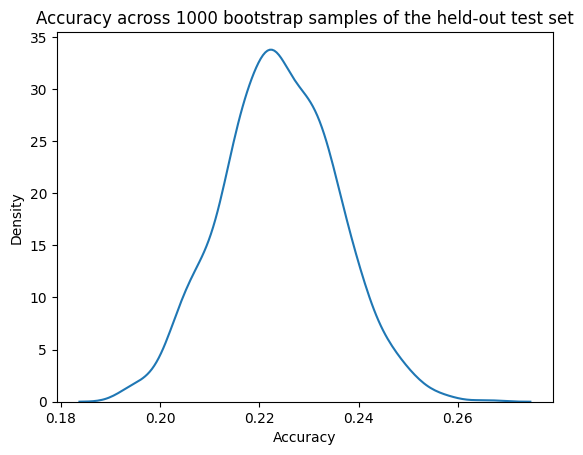

In [65]:
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

In [66]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.22 with a 95% a confidence interval of [0.20,0.25].


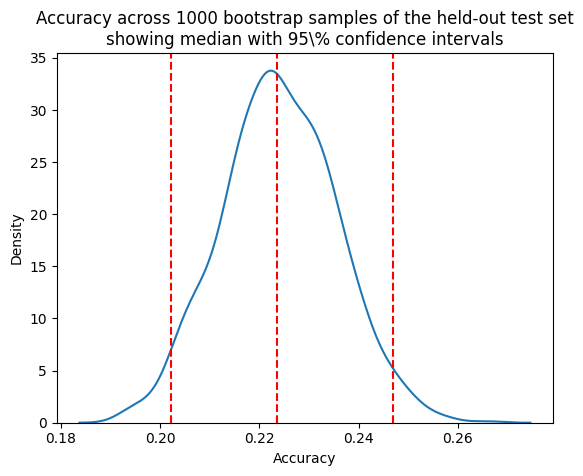

In [67]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()